In [ ]:
!pip install tensorflow
!pip install keras

In [2]:
!pip install spotipy

In [20]:
!pip install requests

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util

import requests

In [3]:
df = pd.read_csv("sample_dataset.csv")
df.head(10)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.137000,0.7300,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.018900,0.8320,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.913000,0.1390,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.089000,0.4380,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.001710,0.9320,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,2020-07-31,27,129410,0.394,0.995000,0.0475,0.955000,0.1050,0.172,-26.432,0.0720,71.241,6,5,Calm
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,2020-08-07,29,141888,0.504,0.994000,0.0584,0.956000,0.1150,0.553,-20.461,0.0516,134.209,5,4,Calm
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,2009-12-28,1,211173,0.586,0.000155,0.9350,0.277000,0.1590,0.580,-9.386,0.0482,114.997,4,4,Happy
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,2000-10-24,68,184640,0.603,0.014400,0.9080,0.000000,0.6710,0.457,-5.254,0.1840,133.063,11,4,Energetic
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,2007-05-15,0,189200,0.331,0.003440,0.8760,0.000835,0.7320,0.299,-1.894,0.0603,175.009,5,4,Energetic


In [4]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y_labels = df['mood']

In [31]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y_labels)
encoded_y = encoder.transform(Y_labels)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,dummy_y,test_size=0.2,random_state=15)

In [6]:
mood_list = ['calm','energetic','happy', 'sad']
number_of_classes = 4;

In [7]:
def initialize_nn():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='sigmoid'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [32]:
model = initialize_nn()
history = model.fit(X_train, Y_train,epochs=300,batch_size=200,verbose=0, validation_split=0.2)

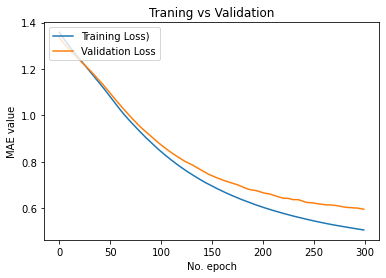

In [33]:
plt.plot(history.history['loss'], label='Training Loss)')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Traning vs Validation')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [34]:
model.evaluate(X_test, Y_test, verbose=2)

5/5 - 0s - loss: 0.5306 - accuracy: 0.7899


[0.530611515045166, 0.7898550629615784]

In [35]:
y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
Y_test = np.argmax(Y_test, axis=1)

In [36]:
y_preds

array([2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 3, 3, 1, 3, 2, 0, 0,
       3, 0, 1, 3, 3, 3, 3, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 0, 3,
       3, 3, 0, 2, 1, 0, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 2, 0, 3, 1, 3, 3, 0, 0, 3, 3, 3, 1, 0, 3, 2, 1, 1, 0, 1, 3, 3,
       0, 1, 1, 0, 2, 3, 3, 1, 1, 0, 3, 1, 2, 0, 0, 3, 3, 2, 2, 0, 1, 2,
       3, 3, 0, 0, 2, 1, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 3,
       1, 1, 1, 3, 3, 2])

In [37]:
Y_test

array([1, 0, 0, 1, 1, 2, 0, 2, 2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 3, 2, 0, 0,
       3, 0, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 1, 0, 0, 0,
       3, 3, 3, 3, 1, 0, 1, 2, 2, 0, 2, 3, 1, 2, 1, 2, 1, 0, 3, 0, 3, 1,
       2, 2, 0, 3, 1, 0, 3, 0, 0, 3, 3, 3, 1, 0, 3, 2, 2, 1, 0, 1, 3, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 0, 3, 1, 2, 0, 3, 3, 3, 3, 2, 0, 2, 2,
       2, 3, 0, 0, 2, 1, 2, 3, 3, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 3,
       1, 1, 1, 3, 3, 2])

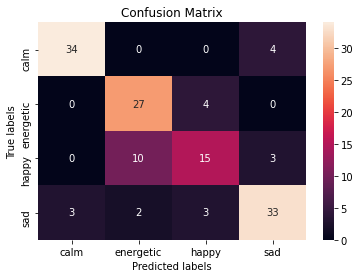

Accuracy Score 0.7898550724637681


In [38]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = mood_list
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [39]:
model.save("new_classifier.h5")

In [40]:
new_model = keras.models.load_model("new_classifier.h5")

In [16]:
client_id='50b04075d9a54b24aafd6f18d37a5061'
client_secret='31b0c647b38449699e7919c375aeb683'
redirect_uri='http://localhost:8888/callback'
username = 'uascr6n5lqh9kfkrok5dxtynz'
scope = 'playlist-modify-public'

In [17]:
manager = SpotifyClientCredentials(client_id,client_secret)
spotify = spotipy.Spotify(client_credentials_manager=manager)

In [18]:
def getSong(uri):
    meta = spotify.track(uri)
    features = spotify.audio_features(uri)
    
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    ids =  meta['id']
    
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']
    
    track = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return track,columns

In [19]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pipe = Pipeline([('minmaxscaler',MinMaxScaler()),('keras', model)])
    #Fit the Pipeline
    pipe.fit(X_train, Y_train)

    #Obtain the features of the song
    preds = getSong(id_song)
    print("Obtained features: ", preds)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pipe.predict(preds_features)
    
    print(results)
    results = np.argmax(results, axis=1)
    print(results)

    #mood = np.array(target['mood'][target['encode']==int(results)])
    mood = mood_list[int(results)]
    name_song = preds[0][0]
    artist = preds[0][2]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")

In [45]:
def predict_mood_better(id_song):
    #Obtain the features of the song
    preds = getSong(id_song)
    print("Obtained features: ", preds)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T
    print(preds_features)

    #Predict the features of the song
    results = model.predict(preds_features)
    
    print(results)
    results = np.argmax(results, axis=1)
    print(results)
    
    mood = mood_list[int(results)]
    name_song = preds[0][0]
    artist = preds[0][2]

    print("{0} by {1} is a {2} song".format(name_song,artist,mood))

In [46]:
predict_mood_better('28cnXtME493VX9NOw9cIUh')
predict_mood_better('0VjIjW4GlUZAMYd2vXMi3b')
predict_mood_better('60nZcImufyMA1MKQY3dcCH')
predict_mood_better('4e7yuouxvWPbK1q2kVlgz8')

Obtained features:  (['Hurt', 'American IV: The Man Comes Around', 'Johnny Cash', '28cnXtME493VX9NOw9cIUh', '2002-01-01', 73, 216533, 0.534, 0.649, 0.392, 0.000227, 0.0948, 0.163, -7.636, 0.0267, 90.379, 9, 4], ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature'])
[[ 2.16533e+05  5.34000e-01  6.49000e-01  3.92000e-01  2.27000e-04
   9.48000e-02  1.63000e-01 -7.63600e+00  2.67000e-02  9.03790e+01]]
[[0. 0. 0. 1.]]
[3]
Hurt by Johnny Cash is a sad song
Obtained features:  (['Blinding Lights', 'After Hours', 'The Weeknd', '0VjIjW4GlUZAMYd2vXMi3b', '2020-03-20', 91, 200040, 0.514, 0.00146, 0.73, 9.54e-05, 0.0897, 0.334, -5.934, 0.0598, 171.005, 1, 4], ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speec

In [44]:
predict_mood('28cnXtME493VX9NOw9cIUh')
predict_mood('0VjIjW4GlUZAMYd2vXMi3b')
predict_mood('60nZcImufyMA1MKQY3dcCH')
predict_mood('4e7yuouxvWPbK1q2kVlgz8')

18/18 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8011
Obtained features:  (['Hurt', 'American IV: The Man Comes Around', 'Johnny Cash', '28cnXtME493VX9NOw9cIUh', '2002-01-01', 73, 216533, 0.534, 0.649, 0.392, 0.000227, 0.0948, 0.163, -7.636, 0.0267, 90.379, 9, 4], ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature'])
[[0. 0. 0. 1.]]
[3]
Hurt by Johnny Cash is a sad song
18/18 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.8029
Obtained features:  (['Blinding Lights', 'After Hours', 'The Weeknd', '0VjIjW4GlUZAMYd2vXMi3b', '2020-03-20', 91, 200040, 0.514, 0.00146, 0.73, 9.54e-05, 0.0897, 0.334, -5.934, 0.0598, 171.005, 1, 4], ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'li